In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# Mykola Krupennyi, dane8.txt

In [2]:
cols=['X','Y','Z']
# have to provide Z value, because separation finds space after Y and creates another column

df = pd.read_csv("dane8.txt", sep=" ", names=cols, header=None)

df.head(10)

,X,Y,Z
0,-3.0,-0.094899,NaN
1,-2.9,-0.105199,NaN
2,-2.8,-0.323964,NaN
3,-2.7,-0.259642,NaN
4,-2.6,-0.177632,NaN
5,-2.5,-0.226139,NaN
6,-2.4,-0.185592,NaN
7,-2.3,-0.074632,NaN
8,-2.2,-0.282650,NaN
9,-2.1,-0.047486,NaN


In [3]:
#drop Z column
df.drop(df.columns[2], axis=1, inplace=True)
df.head()

,X,Y
0,-3.0,-0.094899
1,-2.9,-0.105199
2,-2.8,-0.323964
3,-2.7,-0.259642
4,-2.6,-0.177632


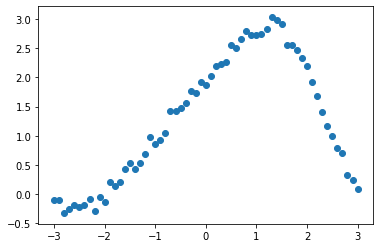

In [4]:
%matplotlib inline
plt.scatter(df.X, df.Y)

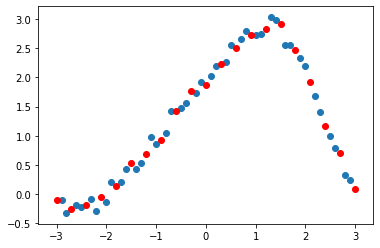

In [5]:
# divide data into train and test arrays
# every third element is added to test list and not considered in training

test_X = []
test_Y = []
train_X = []
train_Y = []

for i in range(len(df.X)):
    if(i%3==0):
        test_X.append(df.X[i])
        test_Y.append(df.Y[i])                  
    else:
        train_X.append(df.X[i])
        train_Y.append(df.Y[i])
        
test=[test_X, test_Y]
train=[train_X, train_Y]

plt.scatter(train_X, train_Y)
plt.scatter(test_X, test_Y, color='red')

In [6]:
# training model using Least Squares

def least_squares(X, Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    num = 0
    den = 0
    for i in range(len(X)):
        num += (X[i] - X_mean)*(Y[i] - Y_mean)
        den += (X[i] - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    return m,c

print(least_squares(train_X,train_Y))

(0.38403082060100163, 1.3133910959999997)


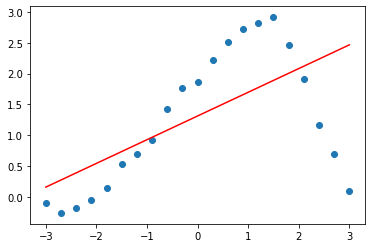

In [97]:
# making a prediction

n = len(test_X) 
Y_pred = np.empty(n)
m, c =least_squares(train_X,train_Y)

for i in range(n):
    Y_pred[i] = m*test_X[i] + c

plt.scatter(test_X, test_Y) # actual
plt.plot([min(test_X), max(test_X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

# obviously this is not perfect solution for this dataset

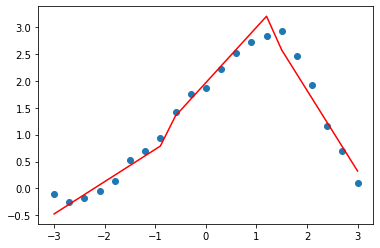

In [141]:
# Modification of previous model
n_train = len(train_X) 
n_test = len(test_X)
Y_pred2 = np.empty(n_test)

# we will divide our data into p parts
# and chek m and c values for every section

def lsq_p(p):
    part_counter = 1 

    m,c = least_squares(train_X[:int(n_train/p)],train_Y[:int(n_train/p)])
    for i in range(n_test):
        Y_pred2[i] = m*test_X[i] + c
        if(i>=n_test/(p/part_counter)):
            m,c = least_squares(train_X[int(part_counter*n_train/p):int((part_counter+1)*n_train/p)],
                                train_Y[int(part_counter*n_train/p):int((part_counter+1)*n_train/p)])
            part_counter+=1
    return Y_pred2



#here is result for division into 3 parts
Y_pred2 = lsq_p(3)

plt.scatter(test_X, test_Y)
plt.plot(test_X, Y_pred2, color='red') 
plt.show()


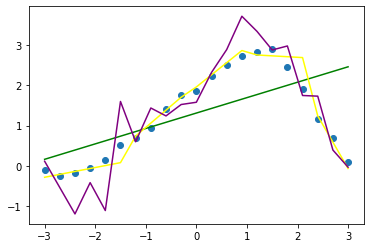

In [156]:
# now we can check how this method works with other parameters

plt.scatter(test_X, test_Y, )
plt.plot(test_X, lsq_p(1), color='green')
# if p = 1 the result will be as in the first model
plt.plot(test_X, lsq_p(5), color='yellow') 
# could be even better than result with p = 3
plt.plot(test_X, lsq_p(18), color='purple') 
# that shows that bigger separations is not perfect solution neither
plt.show()